### Imports
Packages needed for project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')


import functions

%load_ext autoreload
%autoreload 2

### Data Sample
First look at data

In [3]:
initial_data = functions.read_file('../data/master.csv')
initial_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### Data Cleaning
Remove columns and records that will not be utilized. <br /> 
Additionally rename columns to allow for better human readablity.

In [4]:
# remove data from 2015
data_minus_2016 = initial_data[initial_data.year != 2016]

# Folllowing lines were used to find the countries that had less than 3 years of data
# country_group = data_minus_2016.groupby('country').count()
# less_than_three_years = country_group[country_group.year <= 36]
# less_than_three_years

# remove countries with less than 3 years of data
country_filter = ['Bosnia and Herzegovina', 'Cabo Verde', 'Dominica', 'Macau', 'Oman', 'Saint Kitts and Nevis', 'San Marino']
suicide_data = data_minus_2016[~data_minus_2016['country'].isin(country_filter)]
droped = suicide_data.drop(columns=['country-year', 'HDI for year'])

data = functions.rename(droped)

data.tail(200)

,Country,Year,Sex,Age,Suicides,Population,Suicides_per_100K,Annual_GDP,GDP_per_Capita,Generation
27620,Uzbekistan,1995,male,15-24 years,236,2206700,10.69,"13,350,468,917",681,Generation X
27621,Uzbekistan,1995,female,75+ years,15,199900,7.50,"13,350,468,917",681,G.I. Generation
27622,Uzbekistan,1995,female,55-74 years,64,957100,6.69,"13,350,468,917",681,Silent
27623,Uzbekistan,1995,female,25-34 years,80,1772700,4.51,"13,350,468,917",681,Generation X
27624,Uzbekistan,1995,female,35-54 years,77,1856300,4.15,"13,350,468,917",681,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


### Initial Overview
Views of overall data without grouping or filters

Year
1985    12.077819
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    13.067130
1991    13.652196
1992    13.709479
1993    13.833705
1994    14.069714
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.643862
2000    14.059010
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.179699
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.510275
2010    11.341178
2011    11.143542
2012    11.421718
2013    11.107958
2014    11.179518
2015    11.094073
Name: Suicides_per_100K, dtype: float64


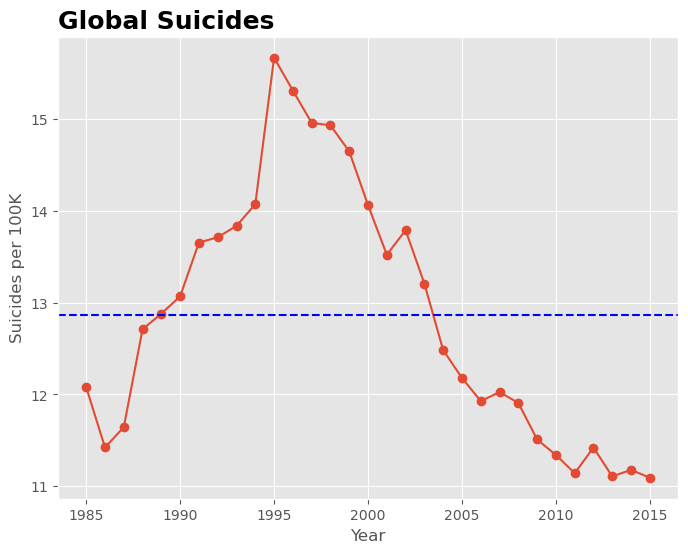

In [28]:
plt.style.use('ggplot')

per_100_annual_rate = data['Suicides_per_100K'].groupby(data.Year).mean()
average_per_100_annual = data['Suicides_per_100K'].sum() / data['Suicides_per_100K'].count()
print(per_100_annual_rate)


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(per_100_annual_rate.index, per_100_annual_rate.values, marker='o')

ax.set_title('Global Suicides', loc='left', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='medium')
ax.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')

ax.axhline(average_per_100_annual, linestyle='--', color='blue')


Text(0, 0.5, 'Suicides per 100K')

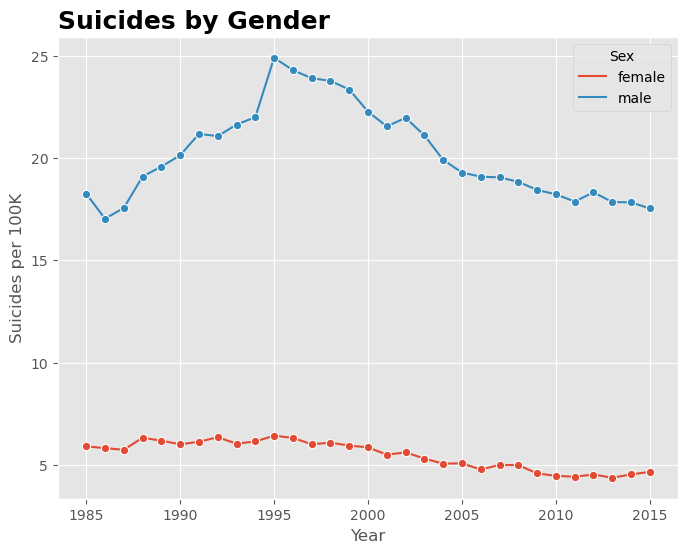

In [29]:
male_female = data.groupby(["Year", "Sex"]).agg("mean").reset_index()


fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x="Year", y="Suicides_per_100K", hue='Sex', ax=ax, data=male_female, marker='o')
ax.set_title('Suicides by Gender', loc='left', fontsize=18, fontweight='bold')

ax.set_xlabel('Year', fontsize=12, fontweight='medium')
ax.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')
